https://in2techs.com/mnist-visualization-using-pca-and-tsne-in-python/?doing_wp_cron=1687769246.2636029720306396484375


Dimensions before PCA: (1797, 64)
Dimensions after PCA-2D: (1797, 2)
Dimensions after PCA-3D: (1797, 3)
Dimensions after tSNE-2D: (1797, 2)
Dimensions after tSNE-3D: (1797, 3)


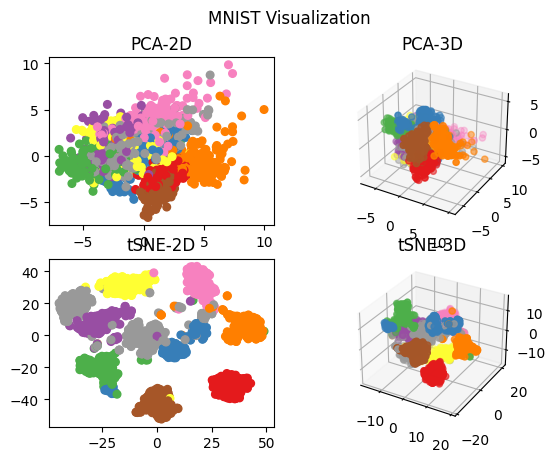

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# load MNIST dataset
X, y = datasets.load_digits(return_X_y=True)
print('Dimensions before PCA:', X.shape)

# use PCA to reduce dimension from 64 to 2
pca_2d = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))
pca_2d.fit(X, y)
X_pca_2d = pca_2d.transform(X)
print('Dimensions after PCA-2D:', X_pca_2d.shape)

# use PCA to reduce dimension from 64 to 3
pca_3d = make_pipeline(StandardScaler(), PCA(n_components=3, random_state=0))
pca_3d.fit(X, y)
X_pca_3d = pca_3d.transform(X)
print('Dimensions after PCA-3D:', X_pca_3d.shape)

# use tSNE to reduce dimension from 64 to 2
tsne = make_pipeline(StandardScaler(), TSNE(n_components=2, init='pca', random_state=0))
tsne.fit(X, y)
X_tsne_2d = tsne.fit_transform(X)
print('Dimensions after tSNE-2D:', X_tsne_2d.shape)

# use tSNE to reduce dimension from 64 to 3
tsne = make_pipeline(StandardScaler(), TSNE(n_components=3, init='pca', random_state=0))
tsne.fit(X, y)
X_tsne_3d = tsne.fit_transform(X)
print('Dimensions after tSNE-3D:', X_tsne_3d.shape)

# plot the points projected with PCA and tSNE
fig = plt.figure()
fig.suptitle('MNIST Visualization')

ax = fig.add_subplot(221)
ax.title.set_text('PCA-2D')
ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, s=30, cmap='Set1')

ax = fig.add_subplot(222, projection='3d')
ax.title.set_text('PCA-3D')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='Set1')

ax = fig.add_subplot(223)
ax.title.set_text('tSNE-2D')
ax.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, s=30, cmap='Set1')

ax = fig.add_subplot(224, projection='3d')
ax.title.set_text('tSNE-3D')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='Set1')

plt.show()